In [1]:
import pandas as pd
surveys_df = pd.read_csv('data/surveys.csv')

### Exercise 1

Type the following commands and check the outputs. Can you tell what each command does? What is the difference between commands with and without parenthesis?

```python
surveys_df.shape
surveys_df.columns
surveys_df.index
surveys_df.dtypes
surveys_df.head(<try_various_integers_here>)
surveys_df.tail(<try_various_integers_here>)
```

### Exercise 2
Perform some basic statistics on the weight column. For practical reasons, it can be useful to first create a variable `weight` that contains the just the weight column. It will make the code look a bit cleaner. Can you tell what each method listed below does? Look at our explorative plot, do the statistics make sense?

```python
weight=surveys_df['weight']
weight.min()
weight.max()
weight.mean()
weight.std()
weight.counts()
```

### Exercise 3
- Swap the order of column names in `surveys_df[['plot_id', 'species_id']]`
- Repeat one of the column names like `surveys_df[['plot_id', 'plot_id', 'species_id']]`
What do the results look like and why?
- Which error occurrs in `surveys_df['plot_id', 'species_id']` and why?
- Which error occurrs in `surveys_df['speciess']`?

### Exercise 4
What happens when you call:
- `surveys_df[0:1]`
- `surveys_df[:4]`
- `surveys_df[:-1]`

What happens when you call:
- `surveys_df.iloc[0:4, 1:4]`
- `surveys_df.loc[0:4, 1:4]`
How are the two commands different?

### Exercise 5
What happens in the following two examples?

- ```surveys_df.iloc[0:4, 1:4]```;
- ```surveys_df.loc[0:4, 1:4]```.


### Exercise 6
- Create a new DataFrame that only contains observations with sex values that are not female or male. Print the number of rows in this new DataFrame. Verify the result by comparing the number of rows in the new DataFrame with the number of rows in the surveys DataFrame where sex is NaN (hint: there is a function `isnull`).
- Create a new DataFrame that contains only observations that are of sex male or female and where weight values are greater than 0.

### Exercise 7: Putting it all together 
1. Clean the column *sex* (leave out samples of which we do not know whether they are male or female)
2. Create a new dataframe *clean_df* which only contains rows of which we have a valid value for *sex* and *weight*
3. Calculate the average weight of that new DataFrame

### Exercise 8
Let's see in which plots animals get more food. Calculate the average weight per plot! Complete the code below.

In [ ]:
grouped_data = surveys_df.groupby(...)
grouped_data[...].mean()

### Exercise 9
Investigate the group keys and row indexes for this more complex grouping example. 
Why are there more than 48 groups?
What happened to the third group and why does it not turn up in our statistics?

In [ ]:
grouped_data = surveys_df.groupby(['sex', 'plot_id'])
len(grouped_data.groups)

### Exercise 10
Would it make sense to group our data frame by the column *weight*? Why or why not?

### Exercise 11
In the given example of vertical concatenation, you concatenated two DataFrames with the same columns. What would happen if the two DataFrames to concatenate have different column number and names?

  1. Create a new DataFrame using the last 10 rows of the species DataFrame (`species_df`);
  2. Concatenate vertically `surveys_df_sub_first10` and your just created DataFrame;
  3. Print the concatenated DataFrame info on the screen. How may rows does it have? What happened to the columns? Explain why you get this result.

In [ ]:
species_df = pd.read_csv("../data/species.csv")

surveys_df_sub_first10 = surveys_df.head(10)

### Exercise 12
In the given example of horizontal concatenation, you first concatenated two DataFrame with different indices, then reset the indices of the second one. Based on the outcome of these two cases, try to answer the following questions:
  1. What happens when you concatenate horizontally two DataFrames with different indexing?
  2. What happens when you concatenate horizontally two DataFrames with the same columns?
  3. What happens when you try to select a column of the `horizontal_stack` DataFrame we just created?
  4. How can you select a specific column, when multiple columns share a name?

In [ ]:
surveys_df_sub_last10 = surveys_df.tail(10)
surveys_df_sub_last10 = surveys_df_sub_last10.reset_index(drop=True)
horizontal_stack = pd.concat([surveys_df_sub_first10, surveys_df_sub_last10], axis=1)

### Exercise 13

Time to play with plots! Create a multiplot following these instructions:
- Using the matplotlib.pyplot function `subplots()`, create a single figure (10x10 inches) with four subplots organized in two rows and two columns; 
- In the top row plot hindfoot_length VS weight for female and male in two different plots with two differen colors;
- In the bottom row, plot the same data of the top row, but using data collected before (left plot) and after (right plot) 1990;
- Give to each plot an appropriate descriptive title and optimize plot labels.
<br>

Feel free to use the DataFrame `plot` method or `plt.scatter` function to plot data points, but be awave that, in any case, the first thing to do is creating _Figure_ and _Axes_.<br>
EXTRA: The four plots have same x and y axes spanning the same range. Can you remove the space between the four plots? Try it!

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

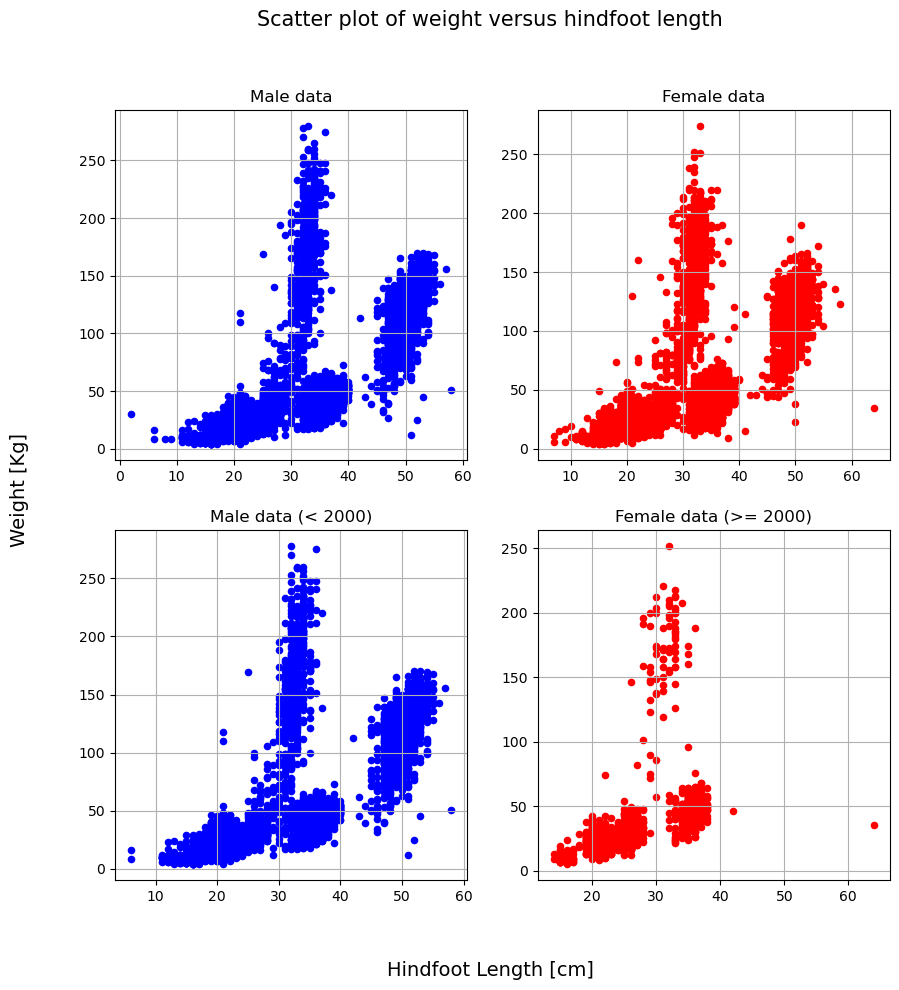

In [18]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2,2,figsize=(10,10)) # prepare a matplotlib figure

# Top left plot, male data
surveys_df[surveys_df['sex']=='M'].plot("hindfoot_length", "weight", kind="scatter", ax=axes[0][0], color='blue')
axes[0][0].set_title('Male data')
axes[0][0].grid()

# Top right plot, female data
surveys_df[surveys_df['sex']=='F'].plot("hindfoot_length", "weight", kind="scatter", ax=axes[0][1], color='red')
axes[0][1].set_title('Female data')
axes[0][1].grid()

year = 2000

# Bottom left plot, male data
surveys_df[(surveys_df['sex']=='M') & (surveys_df['year'] < year)].plot("hindfoot_length", "weight", kind="scatter", ax=axes[1][0], color='blue')
axes[1][0].set_title(f'Male data (< {year})')
axes[1][0].grid()

# Bottom right plot, male data
surveys_df[(surveys_df['sex']=='F') & (surveys_df['year'] >= year)].plot("hindfoot_length", "weight", kind="scatter", ax=axes[1][1], color='red')
axes[1][1].set_title(f'Female data (>= {year})')
axes[1][1].grid()

# Removing individual plot labels
for i in range(2):
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')

# Initializing figure labels
fig.supxlabel("Hindfoot Length [cm]",fontsize=14)
fig.supylabel("Weight [Kg]",fontsize=14)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)